# 12. 의사결정나무 과제 


## boston데이터를 가지고 집값을 예측하는 의사결정나무 모델을 만들고 결과를 해석하세요 

In [150]:
import pandas as pd 
from sklearn.datasets import load_boston
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
boston= load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

In [151]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [152]:
X["price"] = y

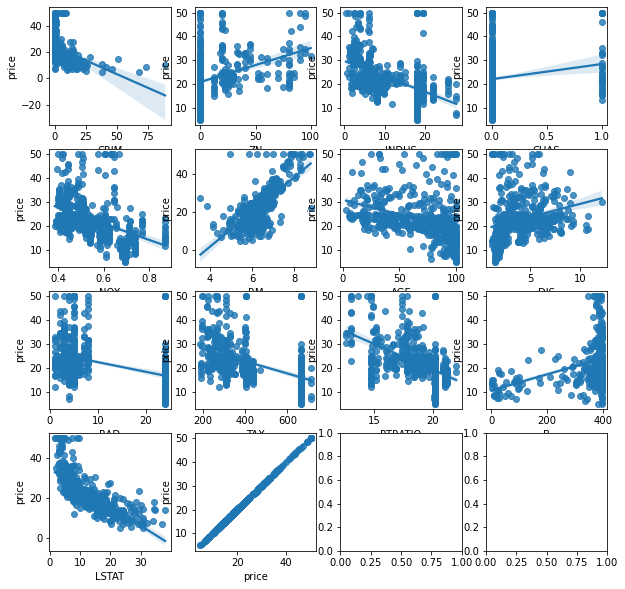

In [153]:
col = X.columns.tolist()
plt.rcParams["figure.figsize"] = [10,10]
fig, axs = plt.subplots(4,4)

for i,col_name in enumerate(col):
    rows = int(i/4)
    cols = i%4
    
    sns.regplot(x = col_name, y = "price", data = X, ax = axs[rows][cols])

In [154]:
feature = X.drop("price", axis = 1)
label = X["price"]

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 2022)

In [156]:
feature

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [157]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
mse = mean_squared_error(y_test, pred)

print("학습 데이터 성능 : {}".format(dt.score(X_train, y_train)))
print("테스트 데이터 성능 : {}".format(dt.score(X_test, y_test)))
print("RMSE : {}".format(np.sqrt(mse)))

학습 데이터 성능 : 1.0
테스트 데이터 성능 : 0.7246780167074458
RMSE : 4.856425477761667


In [158]:
dt.get_depth()

20

In [159]:
# 학습 성능을 향상시키기 위해 GridSearch 시행
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeRegressor()
param_grid = {"max_depth" : range(1,30,2), "min_samples_split":range(1,20)}

grid = GridSearchCV(dt, param_grid= param_grid)
grid.fit(X_train,y_train)

print("최적의 파라미터 : {}".format(grid.best_estimator_))

최적의 파라미터 : DecisionTreeRegressor(max_depth=5, min_samples_split=5)


In [160]:
# 최적의 파라미터로 다시 학습 수행

grid_best_model = grid.best_estimator_
pred = grid_best_model.predict(X_test)

print("최적 파라미터로 학습한 R2_score : {}".format(r2_score(y_test, pred)))

최적 파라미터로 학습한 R2_score : 0.7185116770578077


## titanic데이터를 가지고 생존율을 예측하는 의사결정나무 모델을 만들고 결과를 해석하세요 

In [161]:
df = pd.read_csv("titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


<AxesSubplot:xlabel='pclass', ylabel='survived'>

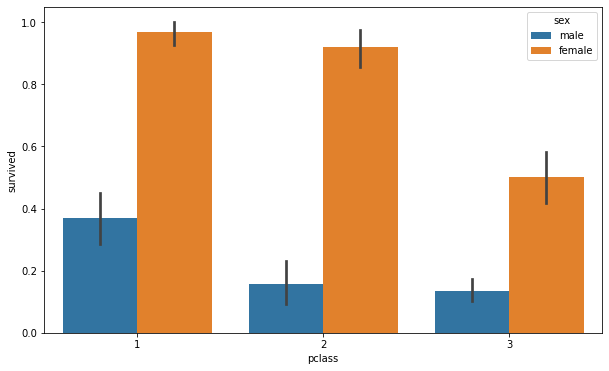

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
sns.barplot(x = "pclass", y = "survived", hue = "sex", data = df)

기본적으로 1등급이 가장 생존율이 높고 3등급이 생존율이 낮음
남자 보다 여자가 생존율이 훨씬 더 높음

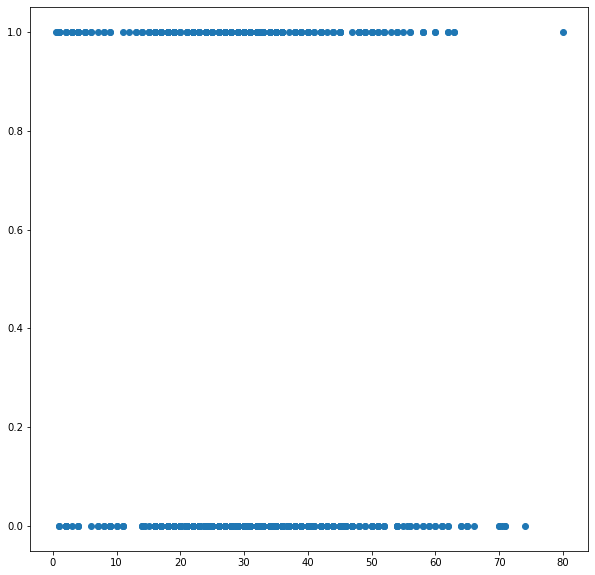

In [164]:
plt.scatter(df["age"], df["survived"])

In [165]:
# 중복 컬럼 제거

df.drop("class", axis = 1, inplace = True)
df.drop("who", axis = 1, inplace = True)
df.drop("adult_male", axis = 1, inplace = True)
df.drop("alive", axis = 1, inplace = True)
df.drop("alone", axis = 1, inplace = True)
df.drop("deck", axis = 1, inplace = True)
df.drop("embark_town", axis = 1, inplace = True)

In [166]:
df["embarked"].value_counts()

df["embarked"] = df["embarked"].fillna("S")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [167]:
df["age"] = df["age"].fillna(df["age"].mean())

In [168]:
df = pd.get_dummies(data = df, columns = ["sex", "embarked"])

In [182]:
df

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [169]:
feature = df.drop("survived",axis = 1)
label = df["survived"]

In [170]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3)

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
dt = DecisionTreeClassifier(max_depth = 5, min_samples_split = 14)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print("학습 데이터 성능 : {}".format(dt.score(X_train, y_train)))
print("테스트 데이터 성능 : {}".format(dt.score(X_test, y_test)))

학습 데이터 성능 : 0.8491171749598716
테스트 데이터 성능 : 0.7835820895522388


In [173]:
dt.get_depth()

5

In [174]:
# 학습 데이터성능에 비해 테스트 데이터 성능이 많이 떨어지므로 grid_searchcv 로 최적화 파라미터 찾기
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
param_grid = {"max_depth": range(1,25), "min_samples_split":range(1,20)}

grid_model = GridSearchCV(dt, param_grid = param_grid, cv = 3)
grid_model.fit(X_train, y_train)
print("grid_best_model : {}".format(grid_model.best_estimator_))

grid_best_model : DecisionTreeClassifier(max_depth=3)


In [175]:
grid_estimator = grid_model.best_estimator_
grid_pred = grid_estimator.predict(X_test)
print("학습 그리드 모델 성능 : {}".format(grid_estimator.score(X_train, y_train)))
print("테스트 그리드 모델 성능 : {}".format(grid_estimator.score(X_test, y_test)))

학습 그리드 모델 성능 : 0.8378812199036918
테스트 그리드 모델 성능 : 0.7985074626865671


In [176]:
from sklearn.metrics import roc_auc_score,confusion_matrix, plot_roc_curve
print("confusion_matrix : {}".format(confusion_matrix(y_test, grid_pred)))

confusion_matrix : [[148  20]
 [ 34  66]]


roc_auc_score : 0.7704761904761905


<Figure size 360x360 with 0 Axes>

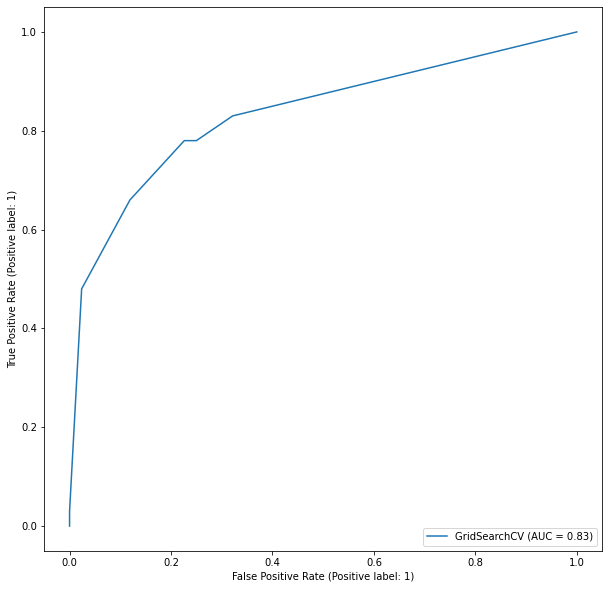

In [177]:
# plot_roc_curve
plt.figure(figsize = (5,5))
plot_roc_curve(grid_model, X_test, y_test);

print("roc_auc_score : {}".format(roc_auc_score(y_test, grid_pred)))

max_depth = 5, min_samples_split = 14 일때 학습과 테스트 모델의 성능 차이를 크게 줄이고 동시에 성능도 크게 개선할수 있었다. 이를 통해 의사결정 나무를 만들어 보자

In [180]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file = "tree.dot", class_names = ["0","1"],\
               feature_names = X_train.columns, impurity = True, filled = True)

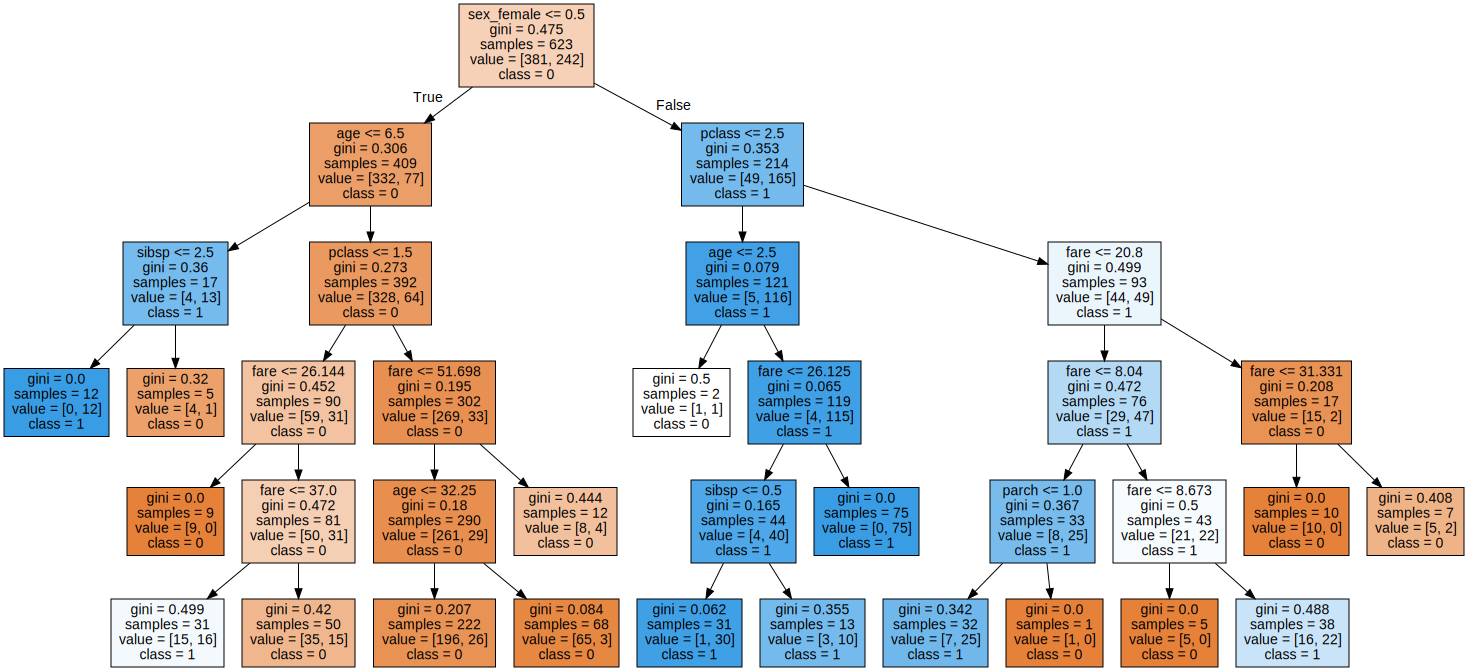

In [183]:
import graphviz

with open("tree.dot","r", encoding = "utf8") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)